In [3]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt   # 시각화 도와주는 패키지
import json   as j 

# 
import seaborn as sns 
import folium as f

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [4]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')  

In [170]:
kowepsFrm = pd.read_excel('../../data/koweps_visualization.xlsx')
kowepsFrm.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [171]:
print('요구사항 01')
print('사용하고자 하는 컬럼만 추출하여 새로운 subset 만들기')
print('rename 함수를 이용해서 컬럼명을 변경한 새로운 subset만들기')

요구사항 01
사용하고자 하는 컬럼만 추출하여 새로운 subset 만들기
rename 함수를 이용해서 컬럼명을 변경한 새로운 subset만들기


In [172]:
kowepsSubset = kowepsFrm[['h12_g3','h12_g4','h12_g10', 'h12_g11', 'h12_eco9','p1202_8aq1','h12_reg7']]
# kowepsSubset.head()
# kowepsSubset.columns    # 컬럼명 확인
# kowepsSubset.rename('h12_g3':'성별', 'h12_g4' : '태어난 연도' ,'h12_g10' : '혼인상태', 'h12_g11' : '종교', 'h12_eco9' : '직종', 'p1202_8aq1' : '일한달의 월 평균 임금','h12_reg7': '7개 권역별 지역구분')
kowepsSubset.columns = ['성별','태어난 연도', '혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']

In [173]:
kowepsSubset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [174]:
print('요구사항 02')
print('조사대상자들에 대한 성별 분포 확인')
print('성별을 비율로 정렬')
# kowepsSubset['성별'].value_counts()
genderFrm = kowepsSubset.filter(['성별'])      # filter은 필수 아님
genderFrm


요구사항 02
조사대상자들에 대한 성별 분포 확인
성별을 비율로 정렬


,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [175]:
# genderFrm['성별'].unique()
def genderFunc(gender) :
    if gender == 1 :
        return '남자'
    else :
        return '여자'
# genderFrm


In [176]:
genderFrm

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [177]:
print('1. apply - ')
# 조건 처리가 필요한 파생 변수의 추가
# genderFrm['성별2'] = genderFrm ['성별'].apply(genderFunc)

print('2. apply(lambda) - ')
genderFrm['성별2'] = genderFrm ['성별'].apply(lambda x : '남자' if x == 1 else'여자')
genderFrm

1. apply - 
2. apply(lambda) - 


,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자
...,...,...
15417,2,여자
15418,2,여자
15419,1,남자
15420,2,여자


In [178]:
print('where() -')
print('where(조건식, true, false) - np')
genderFrm['성별2'] = np.where(genderFrm['성별'] == 1, '남자', '여자')
genderFrm

where() -
where(조건식, true, false) - np


,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자
...,...,...
15417,2,여자
15418,2,여자
15419,1,남자
15420,2,여자


In [179]:
print('성별2 에 대한 결측값 확인')
genderFrm['성별2'].isna().sum()

성별2 에 대한 결측값 확인


0

In [180]:
# genderFrm['성별2'].value_counts()
# 프레임 생성
genderCntFrm = pd.DataFrame(genderFrm['성별2'].value_counts())
genderCntFrm

,성별2
여자,8440
남자,6982


In [181]:
print('성별2 -> 명 변경')
genderCntFrm.rename(columns= {'성별2' : '명'}, inplace=True)


성별2 -> 명 변경


In [182]:
genderCntFrm.sort_values(by ='명', inplace=True)

데이터 시각화
0 6982
1 8440


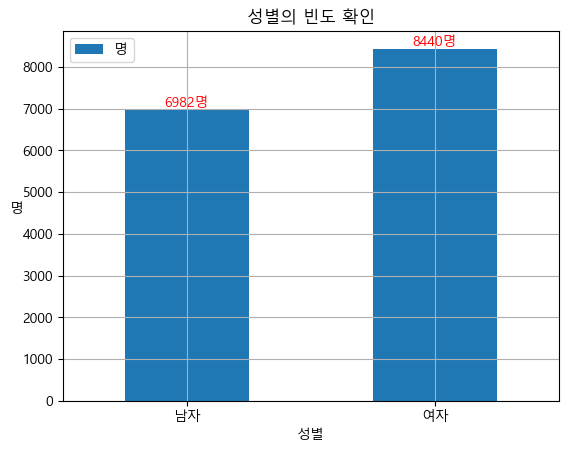

In [183]:
print('데이터 시각화')
genderCntFrm.plot(kind='bar', rot=0)
genderCntFrm

# plt.text()
for idx, value in enumerate(list(genderCntFrm['명'])) :
    print(idx, value)
    plt.text(idx, value, str(value)+'명',
             horizontalalignment = 'center',
             verticalalignment = 'bottom',
             color = 'red' , 
             fontsize = 10)

plt.grid()
plt.title('성별의 빈도 확인')
plt.xlabel('성별')
plt.ylabel('명', rotation = 0)

plt.show()
plt.close()


비율로 시각화 -
파이차트로 마무리


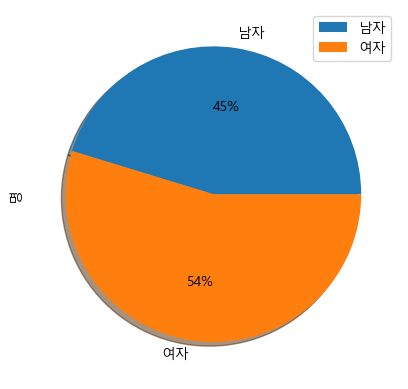

In [184]:
print('비율로 시각화 -')
print('파이차트로 마무리')

plt.figure()
# 방법 1
genderCntFrm['명'].plot(kind='pie' ,
                       legend=True ,
                       autopct = '%d%%', shadow=True)

# 방법 2
# plt.pie(genderCntFrm['명'],
#         labels = genderCntFrm.index,
#         autopct = '%d%%')

plt.show()
plt.close()

In [185]:
print('요구사항 03 - ')
print('성별에 따른 평균급여 차이를 분석한 결과 보고서를 제출하고자 한다')
print('3-1. 성별과 급여만 추출한 서브셋 구축(새로운 프레임 하나 만들기)')
subset = kowepsSubset[['성별','일한달의 월 평균 임금']]
subset

요구사항 03 - 
성별에 따른 평균급여 차이를 분석한 결과 보고서를 제출하고자 한다
3-1. 성별과 급여만 추출한 서브셋 구축(새로운 프레임 하나 만들기)


,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [186]:
print('3-2. 성별을 남자와 여자 데이터로 변환')
subset['성별'] = np.where(subset['성별'] == 1, '남자', '여자')
subset

3-2. 성별을 남자와 여자 데이터로 변환


,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [187]:
print('3-3. 데이터 정제(결측값 확인, 결측값 제거, 이상치 확인, 이상치 결측값으로 만들고 평균 대체)')
# 결측값 확인, 제거
subset.isnull().sum()

3-3. 데이터 정제(결측값 확인, 결측값 제거, 이상치 확인, 이상치 결측값으로 만들고 평균 대체)


성별                  0
일한달의 월 평균 임금    10915
dtype: int64

In [188]:
# 제거
subset.dropna(inplace = True)

In [189]:
# 확인
subset.isnull().sum()

성별              0
일한달의 월 평균 임금    0
dtype: int64

In [190]:
subset.columns = ['gender', 'salary']
subset

,gender,salary
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


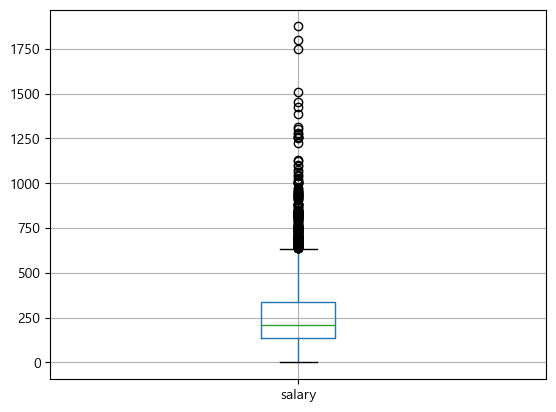

In [191]:
# 이상치 처리 iqr
subset.boxplot()

plt.show()
plt.close()

In [193]:
print('데이터 분석(성별로 그룹화 하여 그룹별 평균)')
print('데이터 시각화 - (막대그래프)')

데이터 분석(성별로 그룹화 하여 그룹별 평균)
데이터 시각화 - (막대그래프)


In [194]:
print('IQR')
# 3,4 분위에 대한 정보 + 1,4 분위에 대한 정보 필요
# q = 분위 수
# subset['hwy'].quantile(q =0.25)
Q1 = subset.quantile(q=0.25)
Q1


IQR


salary    135.0
Name: 0.25, dtype: float64

In [195]:
Q3 = subset.quantile(q = 0.75)
Q3

salary    336.0
Name: 0.75, dtype: float64

In [196]:
IQR = Q3 - Q1
IQR

salary    201.0
dtype: float64

In [197]:
print('lower fence - 최저 한계치')
lower = Q1 - 1.5 * IQR
lower

lower fence - 최저 한계치


salary   -166.5
dtype: float64

In [198]:
print('upper fence - 최고 한계치')
upper = Q3 + 1.5 * IQR
upper

upper fence - 최고 한계치


salary    637.5
dtype: float64

In [199]:
print('lower fence 경계값을 얻어 본다면')
lower_outlier = subset[subset > lower].min()
lower_outlier

lower fence 경계값을 얻어 본다면


gender    None
salary     0.0
dtype: object

In [200]:
print('upper fence 경계값을 얻어 본다면')
upper_outlier = subset[subset < upper].max()
upper_outlier

upper fence 경계값을 얻어 본다면


gender     None
salary    634.0
dtype: object

In [201]:
# 이상치의 데이터값 확인
salary_outlier = subset[ subset['salary']> upper_outlier['salary']]
salary_outlier

,gender,salary
76,남자,841.0
80,남자,691.0
133,남자,1800.0
175,남자,693.0
244,남자,758.0
...,...,...
14970,남자,641.0
15019,남자,952.0
15195,남자,654.0
15292,남자,842.0


In [202]:
type(salary_outlier)    # type 확인 : frame

pandas.core.frame.DataFrame

In [203]:
for idx in salary_outlier.index :
    # print(idx)
    subset.loc[idx, 'salary'] = np.NaN

In [204]:
subset.isnull().sum()   # 207 개가 NaN 값으로 대체

gender      0
salary    207
dtype: int64

In [205]:
# 전체 데이터의 평균
# subset['salary'].mean()
# 위 값으로 결측값을 대체
subset.fillna(subset['salary'].mean(), inplace = True)
subset

,gender,salary
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


<Axes: >

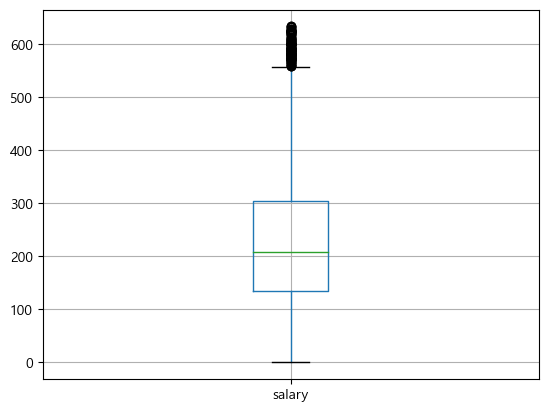

In [206]:
subset.boxplot()

In [207]:
# split 되어있는 각각의 프레임에 통계함수를 적용
subset = subset.groupby('gender').mean()
subset

,salary
gender,
남자,284.423149
여자,170.597361


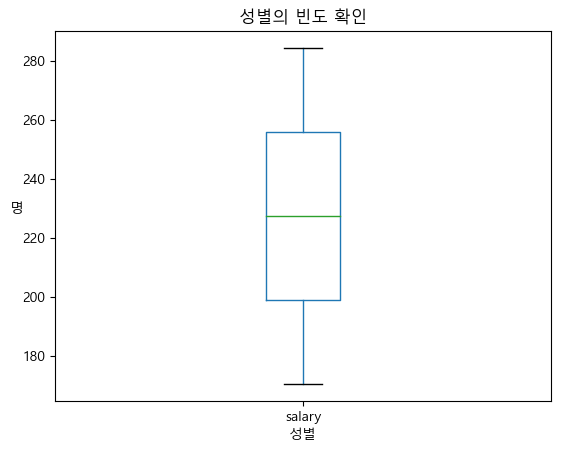

In [208]:
subset.boxplot()
plt.grid()
plt.title('성별의 빈도 확인')
plt.xlabel('성별')
plt.ylabel('명', rotation = 0)

plt.show()
plt.close()

In [209]:
print('요구사항 04')
print('나이에 따른 평균 급여 변화를 분석한 결과보고서를 제출하고자 한다')
subset = kowepsSubset[['태어난 연도','일한달의 월 평균 임금']]
subset.head()

요구사항 04
나이에 따른 평균 급여 변화를 분석한 결과보고서를 제출하고자 한다


,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [210]:
# import datetime as dt => datetime = 모듈 
# 만약 함수라면 from datetime(패키지) import datetime (모듈)

from datetime import datetime       

In [211]:
now_year = datetime.now().year
print('type - ', type(now_year), now_year)

type -  <class 'int'> 2023


In [223]:
print('연령대(20,30,40 etc...)를 계산하는 파생변수가 필요하다')
# subset['태어난 연도']      # series 도출

# 벡터화 연산
# // : 몫 가져오기  = %
subset['연령대'] = ((now_year - subset['태어난 연도']) // 10)*10
# subset= ( (subset['태어난 연도'] // 10).astype('str')+'0').astype('int')
subset

연령대(20,30,40 etc...)를 계산하는 파생변수가 필요하다


,태어난 연도,일한달의 월 평균 임금,연령대
3,1942,108.9,80
10,1940,20.0,80
16,1978,322.0,40
17,1975,120.0,40
24,1975,300.0,40
...,...,...,...
15400,1966,230.0,50
15401,1962,138.0,60
15404,1993,286.0,30
15412,1956,179.0,60


In [224]:
print('결측값 확인, 제거, 그리고 100세 이상은 이상치 처리 - drop')
# subset.isnull().sum()
subset.dropna(inplace=True)

결측값 확인, 제거, 그리고 100세 이상은 이상치 처리 - drop


In [225]:
# 확인
subset.isnull().sum()

태어난 연도          0
일한달의 월 평균 임금    0
연령대             0
dtype: int64

In [233]:
# subset['연령대'].value_counts()
print('연령대별 분포(빈도수) 시각화')
# subset.groupby(by='연령대').count()
resultFrm = pd.DataFrame(subset['연령대'].value_counts())
resultFrm.sort_index(inplace=True)
resultFrm

연령대별 분포(빈도수) 시각화


,연령대
20,134
30,748
40,1110
50,1159
60,767
70,371
80,205
90,13


데이터 분석 (나이별 급여 평균) - 시각화(라인차트, 막대, 파이)
0 134
1 748
2 1110
3 1159
4 767
5 371
6 205
7 13


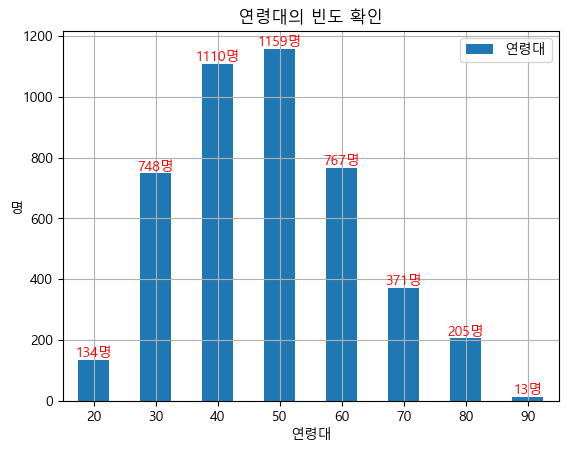

In [237]:
print('데이터 분석 (나이별 급여 평균) - 시각화(라인차트, 막대, 파이)')
resultFrm.plot(kind = 'bar', rot = 0)
# plt.text()
for idx, value in enumerate(list(resultFrm['연령대'])) :
    print(idx, value)
    plt.text(idx, value, str(value)+'명',
             horizontalalignment = 'center',
             verticalalignment = 'bottom',
             color = 'red' , 
             fontsize = 10)

plt.grid()
plt.title('연령대의 빈도 확인')
plt.xlabel('연령대')
plt.ylabel('명', rotation = 0)

plt.show()
plt.close()


In [238]:
# 연령대별 평균임금
resultFrm = subset[['연령대', '일한달의 월 평균 임금']].groupby('연령대').mean()

<Axes: xlabel='연령대'>

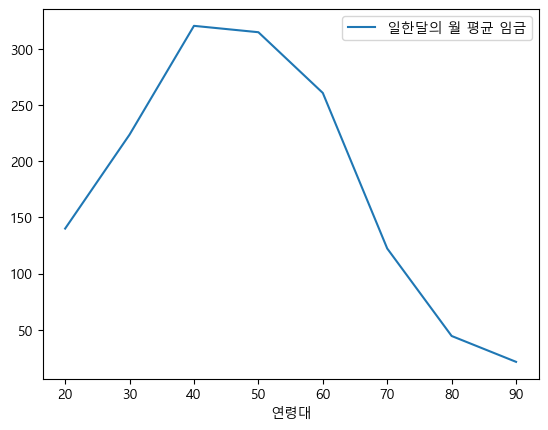

In [239]:
resultFrm.plot(kind = 'line')

0 140.07164179104475
1 223.8659090909091
2 320.8536936936937
3 315.167955133736
4 261.02036505867017
5 122.30080862533693
6 44.29365853658537
7 21.23076923076923


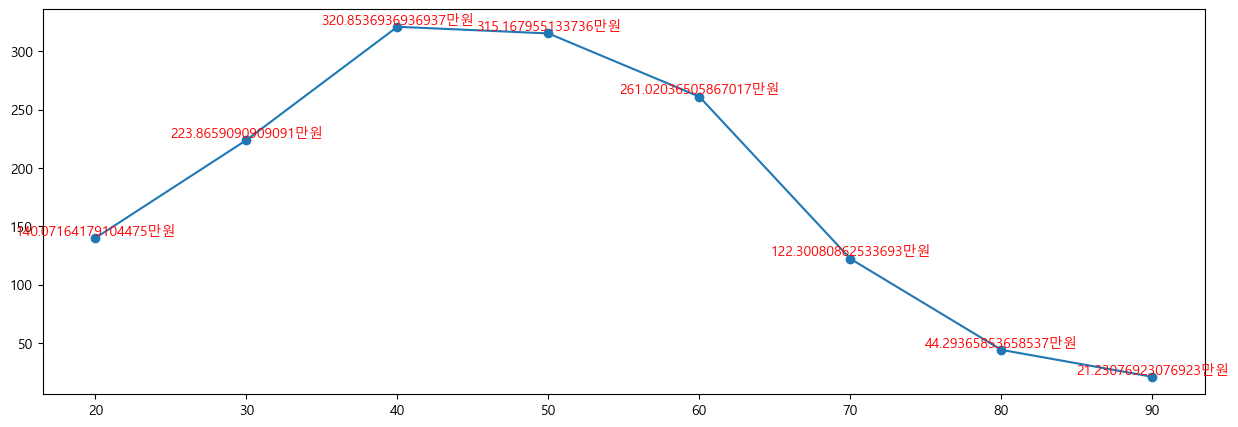

In [240]:
plt.figure(figsize = (15,5))

plt.plot(resultFrm.index,
         resultFrm['일한달의 월 평균 임금'],
         marker = 'o')

for idx, value in enumerate(list(resultFrm['일한달의 월 평균 임금'])) :
    print(idx, value)
    plt.text(resultFrm.index[idx], value, str(value)+'만원',
             horizontalalignment = 'center',
             verticalalignment = 'bottom',
             color = 'red' , 
             fontsize = 10)

plt.show()
plt.close()
